In [1]:
from funciones import *
import pandas as pd
import numpy as np
import pycountry as pc

pd.options.plotting.backend = "plotly"
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib.animation import FuncAnimation


In [21]:
fod = pd.read_csv('../data/Food/food_clean.csv')
soy = pd.read_csv('..\data\Soy\soy_clean.csv', parse_dates=['Year'])
oil_prod = pd.read_csv('../data/Palm/oil_prod_clean.csv')
oil_yield = pd.read_csv('../data/Palm/oil_yield_clean.csv')
pop = pd.read_csv('../data/Population/population_clean.csv')

In [3]:
# Agrupar los datos filtrados por año y sumar el Feed para cada año y país
agregado = df_top_countries.groupby(['Year', 'Entity'])['Feed'].sum().unstack()

# Crear subplots con una sola fila y una columna
fig = make_subplots(rows=1, cols=1)

# Añadir las barras apiladas al subplot
for pais in agregado.columns:
    fig.add_trace(go.Bar(x=agregado.index, y=agregado[pais], name=pais), 1, 1)

# Establecer el título y las etiquetas de los ejes
fig.update_layout(title='Total de Feed por año para los 10 países con más número en Feed',
                  xaxis_title='Año',
                  yaxis_title='Total de Feed')

# Mostrar el gráfico
fig.show()

NameError: name 'df_top_countries' is not defined

In [4]:
agregado = soy.groupby(['Year', 'Entity'])['Feed'].sum().unstack()

top_continents = soy.groupby('Entity')['Feed'].sum().nlargest(5).index

# Filtrar los datos para incluir solo los continentes seleccionados
df_top_continents = soy[soy['Entity'].isin(top_continents)]

# Agrupar los datos filtrados por 'Year' y 'Entity' y sumar el 'Feed'
agregado = df_top_continents.groupby(['Year', 'Entity'])['Feed'].sum().unstack()

# Crear subplots con una sola fila y una columna
fig = make_subplots(rows=1, cols=1)

# Añadir las barras apiladas al subplot
for continente in agregado.columns:
    fig.add_trace(go.Bar(x=agregado.index, y=agregado[continente], name=continente), 1, 1)

# Establecer el título y las etiquetas de los ejes
fig.update_layout(title='Total de Feed por año para los cinco continentes',
                  xaxis_title='Año',
                  yaxis_title='Total de Feed')

# Mostrar el gráfico
fig.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


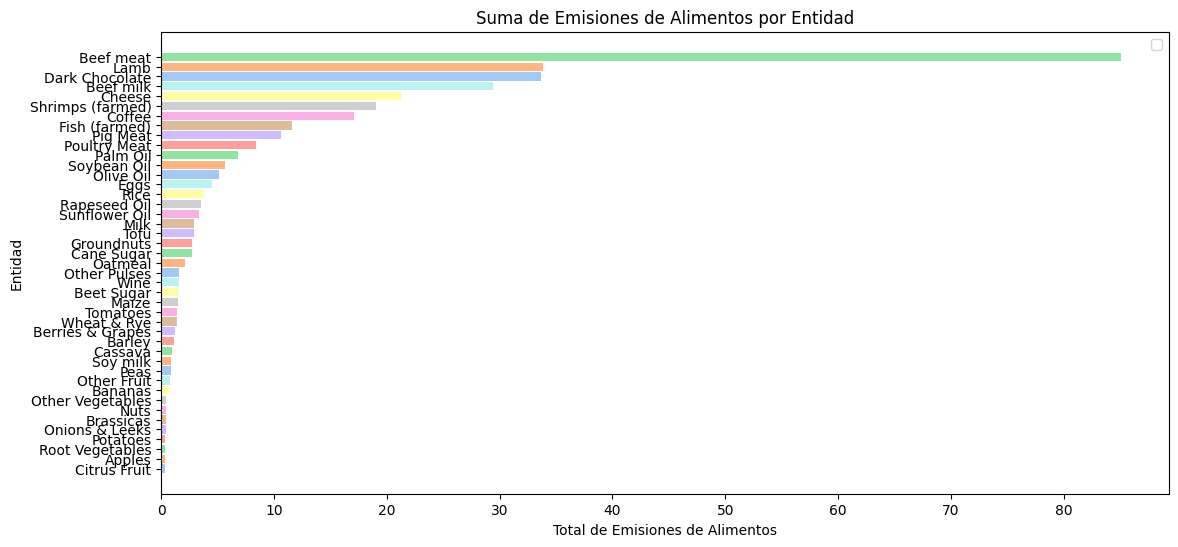

In [5]:
# Calcular la suma de las emisiones de alimentos para cada entidad
fod['Total_Food_Emissions'] = fod.iloc[:, 2:9].sum(axis=1)

df_sorted = fod.sort_values('Total_Food_Emissions', ascending=True)

colors = sns.color_palette('pastel')

# Crear el gráfico de barras horizontales
plt.figure(figsize=(13, 6))
plt.barh(df_sorted['Entity'], df_sorted['Total_Food_Emissions'], color=colors, height=0.85)
plt.xlabel('Total de Emisiones de Alimentos')
plt.ylabel('Entidad')
plt.title('Suma de Emisiones de Alimentos por Entidad')

plt.legend(loc='upper right', labelspacing=2, prop={'size': 10})

plt.rcParams['font.family'] = 'Georgia'

plt.show()

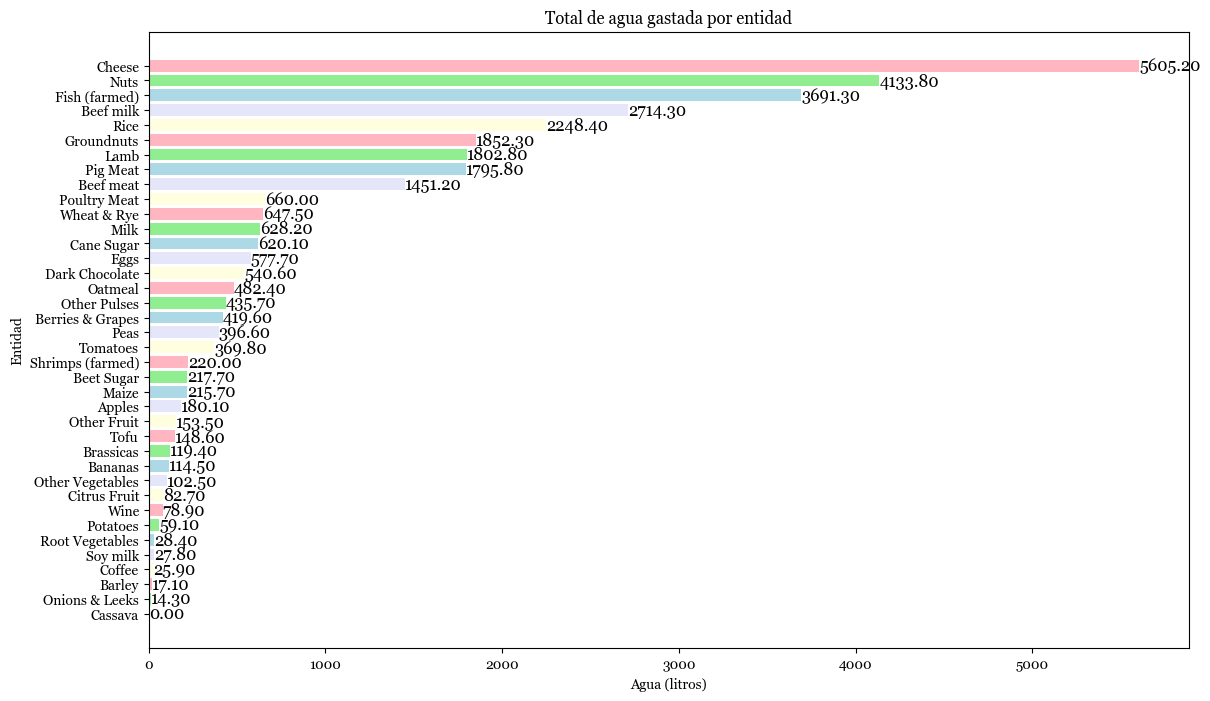

In [6]:
# Crear el gráfico de barras horizontales

df_cleaned = fod.dropna(subset=['Water_l_kg'])

df_sorted = df_cleaned.sort_values('Water_l_kg', ascending=True)

colors = ['lightblue', 'lightgreen', 'lightpink', 'lightyellow', 'lavender']

plt.figure(figsize=(16, 8))
bars = plt.barh(df_sorted['Entity'], df_sorted['Water_l_kg'], color=colors)
# Añadir etiquetas a las barras
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, '{:.2f}'.format(width),
             ha='left', va='center', color='black', fontsize=12)

# Añadir título y etiquetas de los ejes
plt.title('Total de agua gastada por entidad')
plt.xlabel('Agua (litros)')
plt.ylabel('Entidad')

# Ajustar el espaciado de las etiquetas en el eje y
plt.subplots_adjust(left=0.25)

# Mostrar el gráfico
plt.show()

In [7]:
# Eliminar filas con valores nulos en la columna 'Water_l_kg'
df_cleaned = fod.dropna(subset=['Water_l_kg'])

# Ordenar los datos de mayor a menor
df_sorted = df_cleaned.sort_values('Water_l_kg', ascending=True)

# Crear una paleta de colores pastel
colors = ['lightblue', 'lightgreen', 'lightpink', 'lightyellow', 'lavender']

# Crear el gráfico de barras horizontales utilizando Plotly
fig = px.bar(df_sorted, x='Water_l_kg', y='Entity', orientation='h', color='Entity', color_discrete_sequence=colors)

# Añadir etiquetas a las barras
fig.update_traces(texttemplate='%{x:.2f}', textposition='outside')

# Añadir título y etiquetas de los ejes
fig.update_layout(title='Total de agua gastada por entidad (Ordenado de mayor a menor)', xaxis_title='Agua (litros)', yaxis_title='Entidad')

# Ajustar el espaciado de las etiquetas en el eje y
fig.update_layout(yaxis=dict(autorange="reversed", automargin=True))

# Mostrar el gráfico
fig.show()


In [8]:
# Eliminar filas con valores nulos en la columna 'Water_l_kg'
df_cleaned = fod.dropna(subset=['Water_l_kg'])

# Ordenar los datos de mayor a menor
df_sorted = df_cleaned.sort_values('Water_l_kg', ascending=False)

# Crear una paleta de colores pastel
colors = ['lightblue', 'lightgreen', 'lightpink', 'lightyellow', 'lavender']

# Crear la figura y los datos de las barras
fig = go.Figure()

for i, row in df_sorted.iterrows():
    entity = row['Entity']
    water = row['Water_l_kg']
    
    # Añadir una barra al gráfico para cada entidad
    fig.add_trace(go.Bar(
        x=[water],
        y=[entity],
        orientation='h',
        name=entity,
        marker=dict(color=colors[i % len(colors)])
    ))

# Configurar el diseño del gráfico
fig.update_layout(
    title='Total de agua gastada por entidad (Ordenado de mayor a menor)',
    xaxis_title='Agua (litros)',
    yaxis_title='Entidad',
    barmode='stack',
    height=500
)

# Habilitar la selección de entidades
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=['visible', [True] * len(df_sorted)],
                    label='Mostrar todas',
                    method='restyle'
                ),
                dict(
                    args=['visible', [True] * len(df_sorted)],
                    label='Mostrar ninguna',
                    method='restyle'
                )
            ]),
            direction='down',
            pad={'r': 10, 't': 10},
            showactive=True,
            x=0.1,
            xanchor='left',
            y=1.1,
            yanchor='top'
        )
    ]
)

# Actualizar la visibilidad de las entidades al seleccionar/deseleccionar
for i, row in df_sorted.iterrows():
    entity = row['Entity']
    fig.update_traces(visible=True if i < 5 else False, selector=dict(name=entity))

# Mostrar el gráfico
fig.show()

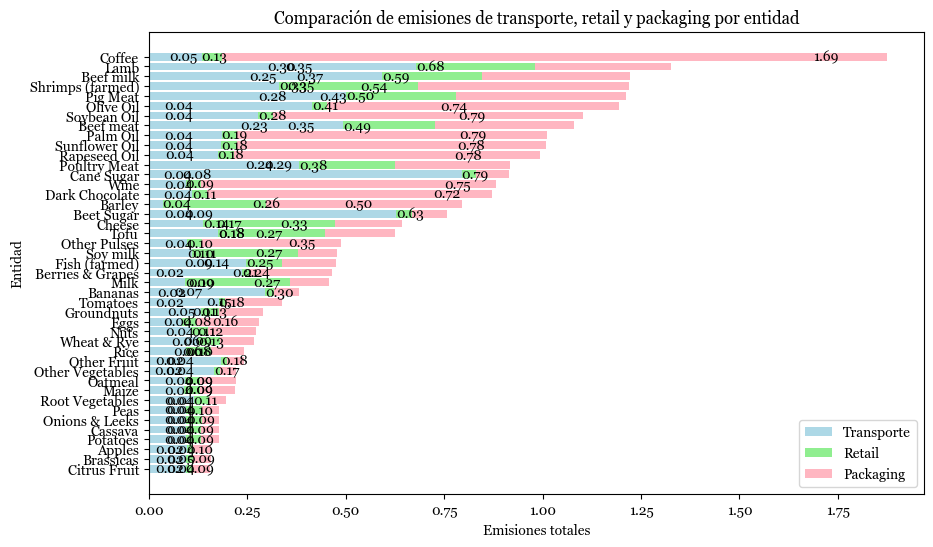

In [9]:
fod['Total_Food_Emissions_Transports'] = fod.iloc[:, 6:9].sum(axis=1)

df_filtered = fod[['Entity', 'food_emissions_transport', 'food_emissions_retail', 'food_emissions_packaging', 'Total_Food_Emissions_Transports']]

df_grouped = df_filtered.groupby('Entity').sum()
df_sorted = df_grouped.sort_values('Total_Food_Emissions_Transports', ascending=True)

# Crear la figura y los datos de las barras
fig, ax = plt.subplots(figsize=(10, 6))
entities = df_sorted.index
transport = df_sorted['food_emissions_transport']
retail = df_sorted['food_emissions_retail']
packaging = df_sorted['food_emissions_packaging']

# Crear las barras apiladas
bottom = None
bars = []
colors = ['lightblue', 'lightgreen', 'lightpink']
labels = ['Transporte', 'Retail', 'Packaging']

for i, data in enumerate([transport, retail, packaging]):
    bar = ax.barh(entities, data, color=colors[i], left=bottom)
    bars.append(bar)
    if bottom is None:
        bottom = data
    else:
        bottom += data

# Añadir etiquetas de valor a las barras
for bar in bars:
    for rect in bar:
        width = rect.get_width()
        if width > 0:
            ax.text(width, rect.get_y() + rect.get_height() / 2, '{:.2f}'.format(width),
                    ha='left', va='center', color='black', fontsize=10)

# Añadir leyenda
ax.legend(bars, labels, loc='lower right')

# Añadir título y etiquetas de los ejes
ax.set_title('Comparación de emisiones de transporte, retail y packaging por entidad')
ax.set_xlabel('Emisiones totales')
ax.set_ylabel('Entidad')

# Mostrar el gráfico
plt.show()



In [10]:
fod['Total_Food_Emissions_Transports'] = fod.iloc[:, 6:9].sum(axis=1)

df_filtered = fod[['Entity', 'food_emissions_transport', 'food_emissions_retail', 'food_emissions_packaging', 'Total_Food_Emissions_Transports']]

df_grouped = df_filtered.groupby('Entity').sum()
df_sorted = df_grouped.sort_values('Total_Food_Emissions_Transports', ascending=False)

entities = df_sorted.index
transport = df_sorted['food_emissions_transport']
retail = df_sorted['food_emissions_retail']
packaging = df_sorted['food_emissions_packaging']

# Crear las barras apiladas
fig = go.Figure()

fig.add_trace(go.Bar(y=entities, x=transport, name='Transporte', orientation='h'))
fig.add_trace(go.Bar(y=entities, x=retail, name='Retail', orientation='h'))
fig.add_trace(go.Bar(y=entities, x=packaging, name='Packaging', orientation='h'))

# Actualiza grafico 

def sort_entities(column_name):
    sorted_indices = df_grouped[column_name].sort_values(ascending=False).index
    return [entity for entity in entities if entity in sorted_indices]

# Diseño del gráfico
fig.update_layout(
    title='Comparación de emisiones de transporte, retail y packaging por entidad',
    xaxis_title='Emisiones totales',
    yaxis_title='Entidad',
    barmode='stack',
    bargap=0.2,
    legend=dict(
        x=1.05,
        y=0.5,
        bgcolor='rgba(255, 255, 255, 0.5)',
        itemclick='toggle',
        itemdoubleclick='toggleothers',
        traceorder='reversed'
    ),
)

# Mostrar el gráfico
fig.show()

In [11]:

# Ordenar el dataframe por la suma de las columnas 'food_emissions_land_use' y 'food_emissions_farm'
df_sorted = fod.sort_values(['food_emissions_land_use', 'food_emissions_farm'], ascending=False)

# Obtener los valores de las columnas
entities = df_sorted['Entity']
land_use = df_sorted['food_emissions_land_use']
farm = df_sorted['food_emissions_farm']

# Crear las barras apiladas
fig = go.Figure()
fig.add_trace(go.Bar(y=entities, x=land_use, name='Land Use', orientation='h'))
fig.add_trace(go.Bar(y=entities, x=farm, name='Farm', orientation='h'))

# Actualizar el diseño del gráfico
fig.update_layout(
    title='Comparación de emisiones de Land Use y Farm por entidad',
    xaxis_title='Emisiones totales',
    yaxis_title='Entidad',
    barmode='stack',
    bargap=0.2,
    legend=dict(
        x=1.05,
        y=0.5,
        bgcolor='rgba(255, 255, 255, 0.5)',
        itemclick='toggle',
        itemdoubleclick='toggleothers',
    ),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
)

# Definir la paleta de colores
colors = ['rgb(239, 154, 154)', 'rgb(144, 202, 249)']

# Asignar colores a las barras
for i, bar in enumerate(fig['data']):
    bar['marker']['color'] = colors[i % len(colors)]

# Crear leyenda con el nombre de las entidades
legend_text = [str(entity) for entity in entities]

for i, entity in enumerate(entities):
    fig.update_traces(name=str(entity), selector=dict(name=legend_text[i]))

# Mostrar el gráfico
fig.show()




In [12]:
todos = soy['Entity'].value_counts().index.to_list()
paises = filtrar_paises(todos)
paises

['Liberia',
 'Mexico',
 'Pakistan',
 "Korea, Democratic People's Republic of",
 'Nigeria',
 'Nepal',
 'Myanmar',
 'Malaysia',
 'Peru',
 'Japan',
 'Italy',
 'Iran, Islamic Republic of',
 'Indonesia',
 'Paraguay',
 'Philippines',
 'Timor-Leste',
 'Viet Nam',
 'Uruguay',
 'United States',
 'Uganda',
 'Turkey',
 'Thailand',
 'Romania',
 'Tanzania, United Republic of',
 'Taiwan, Province of China',
 'Suriname',
 'Sri Lanka',
 'Korea, Republic of',
 'South Africa',
 'India',
 'Zimbabwe',
 'Cambodia',
 'Colombia',
 'Argentina',
 'Australia',
 'China',
 'Brazil',
 'Canada',
 'Bulgaria',
 'Ecuador',
 'South Africa',
 'Hungary',
 'Rwanda',
 'Bolivia, Plurinational State of',
 'Chile',
 'El Salvador',
 'Spain',
 'Egypt',
 'Zambia',
 'France',
 'Iraq',
 'Nicaragua',
 'Madagascar',
 'New Zealand',
 'Cameroon',
 'Albania',
 'Mali',
 'Guatemala',
 'Morocco',
 'Burkina Faso',
 'Costa Rica',
 'Guyana',
 'Gabon',
 'Benin',
 'Venezuela, Bolivarian Republic of',
 'Jordan',
 'Greece',
 'Switzerland',
 'Bel

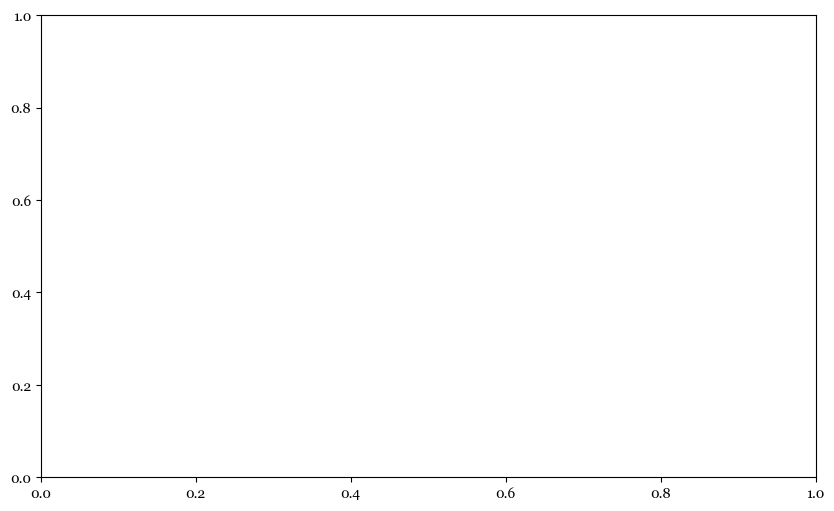

In [13]:
# Filtrar el DataFrame para incluir solo los países de la lista 'paises'
df_filtered = soy[soy['Entity'].isin(paises)]

# Agrupar los datos por país y año, y calcular la suma del área cosechada en hectáreas
grouped = df_filtered.groupby(['Entity', 'Year'])['Area harvested'].sum().reset_index()

# Ordenar los países por el área cosechada total en orden descendente
top_countries = grouped.groupby('Entity')['Area harvested'].sum().nlargest(5).index

# Filtrar los datos para incluir solo los cinco países con mayor área cosechada
df_top_countries = grouped[grouped['Entity'].isin(top_countries)]

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Función para actualizar el gráfico en cada frame de la animación
def update(frame):
    ax.clear()
    year_data = df_top_countries[df_top_countries['Year'] == frame]
    
    # Crear un gráfico de línea para cada país seleccionado en el año actual
    for country in top_countries:
        country_data = year_data[year_data['Entity'] == country]
        ax.plot(country_data['Year'], country_data['Area harvested'], label=country)
    
    ax.set_xlabel('Año')
    ax.set_ylabel('Área cosechada (hectáreas)')
    ax.set_title('Evolución del área cosechada por país - Año {}'.format(frame))
    ax.legend()

# Obtener los años únicos en el DataFrame
years = df_top_countries['Year'].unique()

# Crear la animación
animation = FuncAnimation(fig, update, frames=years, interval=1000)

# Mostrar la animación
plt.show()

In [14]:
# Filtrar el DataFrame para incluir solo los países de la lista 'paises'
df_filtered = soy[soy['Entity'].isin(paises)]

# Agrupar los datos por país y año, y calcular la suma del área cosechada en hectáreas
grouped = df_filtered.groupby(['Entity', 'Year'])['Area harvested'].sum().reset_index()

# Ordenar los países por el área cosechada total en orden descendente
top_countries = grouped.groupby('Entity')['Area harvested'].sum().nlargest(5).index

# Filtrar los datos para incluir solo los cinco países con mayor área cosechada
df_top_countries = grouped[grouped['Entity'].isin(top_countries)]

# Crear el gráfico interactivo utilizando Plotly Express
fig = px.line(df_top_countries, x='Year', y='Area harvested', color='Entity',
              labels={'Year': 'Año', 'Area harvested': 'Área cosechada (hectáreas)'},
              title='Evolución del área cosechada por país')

# Configurar la animación para que se mueva automáticamente por años
fig.update_layout(
    xaxis=dict(range=[df_top_countries['Year'].min(), df_top_countries['Year'].max()], autorange=False),
    updatemenus=[
        dict(
            type='buttons',
            buttons=[
                dict(label='Reproducir',
                     method='animate',
                     args=[None, {'frame': {'duration': 1000, 'redraw': True}, 'fromcurrent': True, 'transition': {'duration': 500}}]),
                dict(label='Pausa',
                     method='animate',
                     args=[[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate', 'transition': {'duration': 0}}])
            ],
            active=0,
            showactive=True,
            x=0.05,
            y=0,
            xanchor='right',
            yanchor='bottom'
        )
    ]
)

# Configurar los fotogramas de la animación
frames = []
for year in df_top_countries['Year'].unique():
    frame_data = df_top_countries[df_top_countries['Year'] == year]
    frame = dict(
        data=[dict(type='scatter', x=frame_data['Year'], y=frame_data['Area harvested'], mode='lines', name=country)
              for country in top_countries],
        name=str(year)
    )
    frames.append(frame)

fig.update(frames=frames)

# Mostrar el gráfico interactivo
fig.show()

In [45]:
soy.loc[soy['Entity'] == 'Brazil', soy['Area harvested'].max()]

KeyError: 127057168.0

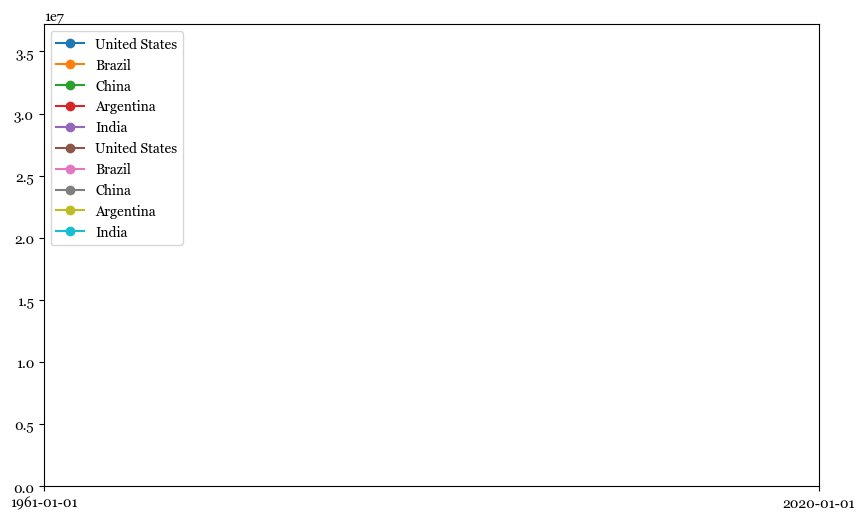

In [15]:
# Filtrar el DataFrame para incluir solo los países de la lista 'paises'
df_filtered = soy[soy['Entity'].isin(paises)]

# Agrupar los datos por país y año, y calcular la suma del área cosechada en hectáreas
grouped = df_filtered.groupby(['Entity', 'Year'])['Area harvested'].sum().reset_index()

# Obtener los 5 países con el mayor área cosechada
top_countries = grouped.groupby('Entity')['Area harvested'].sum().nlargest(5).index

# Filtrar los datos para incluir solo los cinco países con mayor área cosechada
df_top_countries = grouped[grouped['Entity'].isin(top_countries)]

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(10, 6))

# Configurar el eje y los límites
ax.set_xlim(df_top_countries['Year'].min(), df_top_countries['Year'].max())
ax.set_ylim(0, df_top_countries['Area harvested'].max())

# Inicializar una lista vacía para almacenar las líneas de cada país
lines = []

# Definir una función para inicializar el gráfico
def init():
    for country in top_countries:
        line, = ax.plot([], [], marker='o', label=country)
        lines.append(line)
    ax.legend(loc='upper left')
    return lines

# Definir una función para actualizar el gráfico en cada fotograma de la animación
def update(frame):
    ax.clear()
    ax.set_xlim(df_top_countries['Year'].min(), df_top_countries['Year'].max())
    ax.set_ylim(0, df_top_countries['Area harvested'].max())
    ax.set_title(f'Año {frame}')
    ax.set_xlabel('Año')
    ax.set_ylabel('Área cosechada (hectáreas)')
    
    data = df_top_countries[df_top_countries['Year'] == frame]
    for i, country in enumerate(top_countries):
        country_data = data[data['Entity'] == country]
        lines[i], = ax.plot(country_data['Year'], country_data['Area harvested'], marker='o', label=country)
    
    ax.legend(loc='upper left')
    return lines

# Crear la animación
ani = FuncAnimation(fig, update, frames=df_top_countries['Year'].unique(), init_func=init, blit=True)

# Guardar la animación como un archivo de video (requiere FFMpeg instalado)
# ani.save('evolucion_area_cosechada.mp4', writer='ffmpeg')

# Mostrar el gráfico (opcional)
plt.show()

In [22]:
soy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5469 entries, 0 to 5468
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Entity          5469 non-null   object        
 1   Code            5469 non-null   int64         
 2   Year            5469 non-null   datetime64[ns]
 3   Food            5369 non-null   float64       
 4   Feed            3090 non-null   float64       
 5   Processed       4404 non-null   float64       
 6   Production      5467 non-null   float64       
 7   Yield           5094 non-null   float64       
 8   Area harvested  5463 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 384.7+ KB


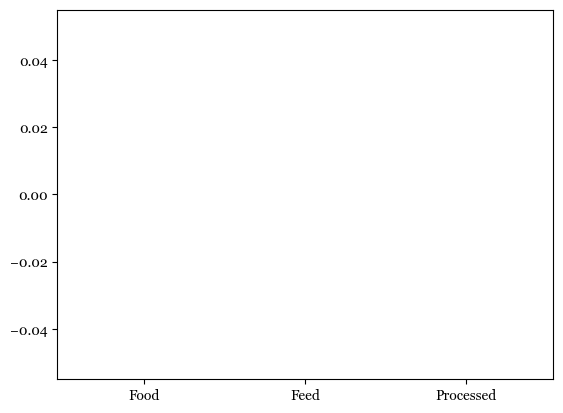

In [25]:
df = soy[soy['Year'].dt.year >= 2000]

totals = df[['Food', 'Feed', 'Processed']].sum()

# Crear la figura y el eje
fig, ax = plt.subplots()

# Configurar los datos y las etiquetas del eje x
x_labels = ['Food', 'Feed', 'Processed']
x = np.arange(len(x_labels))

# Crear las barras verticales
bars = ax.bar(x, np.zeros(len(x)))

# Función para animar el crecimiento de las barras
# def animate(i):
#     total_heights = totals * i / 100
#     for j, bar in enumerate(bars):
#         bar.set_height(total_heights[j])
#         ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
#                 f'{total_heights[j]:.2f}', ha='center', va='bottom')
#     ax.set_title(f'Progress: {i}%')

# Crear la animación

# anim = FuncAnimation(fig, animate, frames=100, interval=50, repeat=False)

# Configurar el eje y los límites
# ax.set_ylim(0, totals.max() * 1.1)

# Configurar las etiquetas del eje x
ax.set_xticks(x)
ax.set_xticklabels(x_labels)

# Mostrar el gráfico
plt.show()

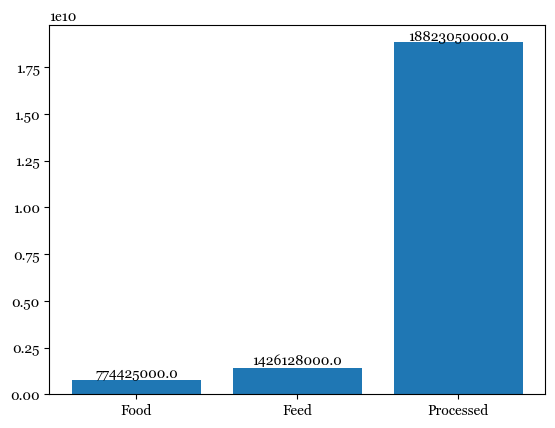

In [27]:
df = soy[soy['Year'].dt.year >= 2000]

# Calcular la suma total de las columnas "Food", "Feed" y "Processed"
totals = df[['Food', 'Feed', 'Processed']].sum()

# Crear la figura y el eje
fig, ax = plt.subplots()

# Configurar los datos y las etiquetas del eje x
x_labels = ['Food', 'Feed', 'Processed']
x = range(len(x_labels))

# Crear las barras verticales
bars = ax.bar(x, totals)

# Agregar etiquetas a las barras
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height,
            f'{height}', ha='center', va='bottom')

# Configurar las etiquetas del eje x
ax.set_xticks(x)
ax.set_xticklabels(x_labels)

# Mostrar el gráfico
plt.show()

In [28]:
fod.head(1)

,Entity,Code,food_emissions_land_use,food_emissions_farm,food_emissions_animal_feed,food_emissions_processing,food_emissions_transport,food_emissions_retail,food_emissions_packaging,food_emissions_losses,Water_l_kg
0,Apples,1,-0.028951,0.225816,0.0,0.00382,0.095804,0.016578,0.044526,0.070808,180.1


In [29]:
fod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Entity                      43 non-null     object 
 1   Code                        43 non-null     int64  
 2   food_emissions_land_use     43 non-null     float64
 3   food_emissions_farm         43 non-null     float64
 4   food_emissions_animal_feed  43 non-null     float64
 5   food_emissions_processing   43 non-null     float64
 6   food_emissions_transport    43 non-null     float64
 7   food_emissions_retail       43 non-null     float64
 8   food_emissions_packaging    43 non-null     float64
 9   food_emissions_losses       43 non-null     float64
 10  Water_l_kg                  38 non-null     float64
dtypes: float64(9), int64(1), object(1)
memory usage: 3.8+ KB


In [37]:
# Filtrar los datos para la 'Soy milk'
soy_milk_emissions = fod[fod['Entity'] == 'Soy milk']

# Calcular el total de las emisiones de 200g
total_emissions = soy_milk_emissions[['food_emissions_land_use', 'food_emissions_farm', 'food_emissions_animal_feed',
                                      'food_emissions_processing', 'food_emissions_transport', 'food_emissions_retail',
                                      'food_emissions_packaging', 'food_emissions_losses']].sum().sum() * 0.2

# Result
print("Total de emisiones de 'Soy milk' (200g):", total_emissions)
total_emissions * 365

Total de emisiones de 'Soy milk' (200g): 0.1950358306


71.188078169

In [39]:
# Filtrar los datos para la 'Soy milk'
soy_milk_emissions = fod[fod['Entity'] == 'Soy milk']

# Gasto de agua de 200g
total_emissions = soy_milk_emissions[['Water_l_kg']].sum().sum() * 0.2

# Result
print("Total de litros de 'Soy milk' (200g):", total_emissions)
total_emissions * 365

Total de litros de 'Soy milk' (200g): 5.5600000000000005


2029.4

In [41]:
# Filtrar los datos para la 'Beef milk'
soy_milk_emissions = fod[fod['Entity'] == 'Beef milk']

# Gasto de agua de 200g
total_emissions = soy_milk_emissions[['Water_l_kg']].sum().sum() * 0.2

# Result
print("Total de litros de 'Beef milk' (200g):", total_emissions)
total_emissions * 365

Total de litros de 'Beef milk' (200g): 542.86


198143.9

In [36]:
# Filtrar los datos para la entidad 'Tofu'
tofu_emissions = fod[fod['Entity'] == 'Tofu']

# Calcular el total de las emisiones para 150g
total_emissions = tofu_emissions[['food_emissions_land_use', 'food_emissions_farm', 'food_emissions_animal_feed',
                                      'food_emissions_processing', 'food_emissions_transport', 'food_emissions_retail',
                                      'food_emissions_packaging', 'food_emissions_losses']].sum().sum() * 0.15

# result
print("Total de emisiones de 'Tofu' (250g):", total_emissions)
total_emissions * 365

Total de emisiones de 'Tofu' (250g): 0.47426165415


173.10550376474998

In [42]:
# Filtrar los datos para la 'Tofu'
soy_milk_emissions = fod[fod['Entity'] == 'Tofu']

# Gasto de agua de 200g
total_emissions = soy_milk_emissions[['Water_l_kg']].sum().sum() * 0.15

# Result
print("Total de litros de 'Tofu' (150g):", total_emissions)
total_emissions * 365

Total de litros de 'Tofu' (150g): 22.29


8135.849999999999